## Importing Libraries and Loading Dataset

The dataset contains information about breast cancer tumors with 569 entries.
Each enty  represents a tumor and includes various features measured, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Brest Cancer Dataset
df = pd.read_csv('Breast_Cancer_Data.csv')

In [3]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration and Preprocessing

Exploring data is an essential step in any data analysis project. It helps us understand the structure of the dataset, identify any missing or erroneous values, and gain insights into the relationships between variables.

In [4]:
# Displaying the shape of the dataset (number of rows, number of columns)
df.shape

(569, 33)

In [5]:
# Displaying dataset information (data types, number of non-null values, columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### From the information on our dataframe:
1. There are no missing values in any of the columns except for 'Unnamed: 32', which has all values missing (0 non-null values).
2. All columns, except 'diagnosis', are numerical (float64 or int64), which is suitable for machine learning models.hms.

##### Potential Preprocessing Steps:
1. Drop the 'id' column as it likely does not provide meaningful information for classification.
2. Drop the 'Unnamed: 32' column as it contains no useful information.
3. Encode the 'diagnosis' column to numerical values (e.g., 0 for benign, 1 for malignant) for model training.

In [1]:
# Remove the 'id' and 'Unnamed: 32' columns from the DataFrame
df.drop(['id', 'Unnamed: 32'], axis =1, inplace = True )

NameError: name 'df' is not defined

In [7]:
# Get the unique values in the 'diagnosis' column of the dataset
print(df['diagnosis'].unique())

# One Hot Encoding the Diagnosis Column
df = pd.get_dummies(data=df, drop_first=True, dtype = 'int64')

['M' 'B']


In [8]:
# Generating descriptive statistics of the DataFrame
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# Check the distribution of 'diagnosis' to understand the class balance.
class_distribution = df['diagnosis_M'].value_counts()
print(class_distribution)

diagnosis_M
0    357
1    212
Name: count, dtype: int64


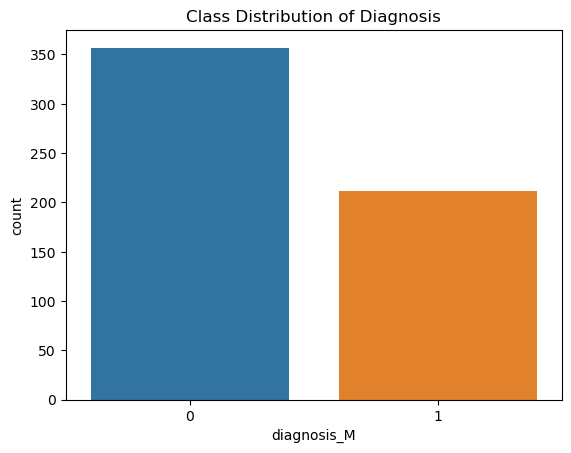

In [10]:
# Visualising class balance.
sns.countplot(x='diagnosis_M', data= df, label = 'count')
plt.title('Class Distribution of Diagnosis')
plt.show()

##### Visualize the distribution of a feature for each class

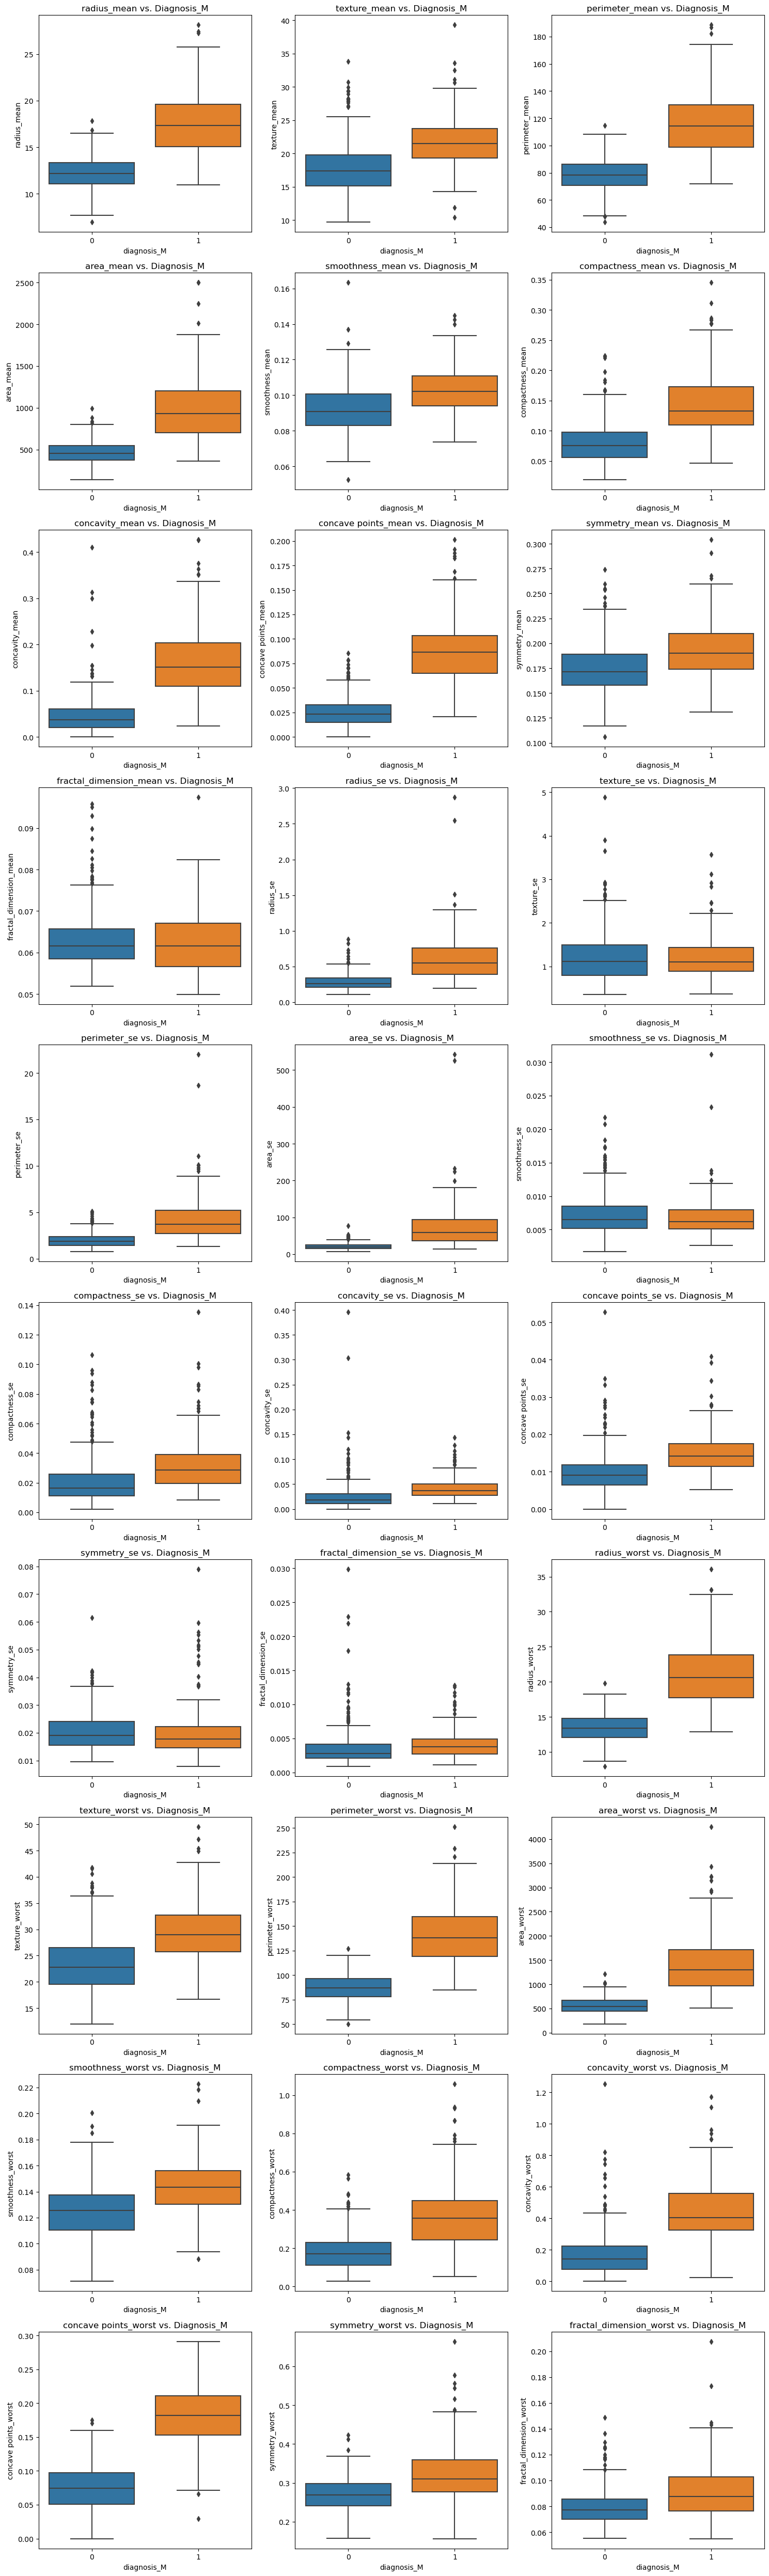

In [11]:
# Getting the list of numerical column names
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the 'diagnosis_M' column from the list if it's present
columns = [col for col in columns if col != 'diagnosis_M']

# Create a grid of subplots
fig, axes = plt.subplots(10, 3, figsize=(15, 50))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(columns):
    sns.boxplot(x='diagnosis_M', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Diagnosis_M')
    
plt.tight_layout()
plt.show()

In [12]:
# Calculate the correlation matrix
corr = df.corr()
print(corr)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

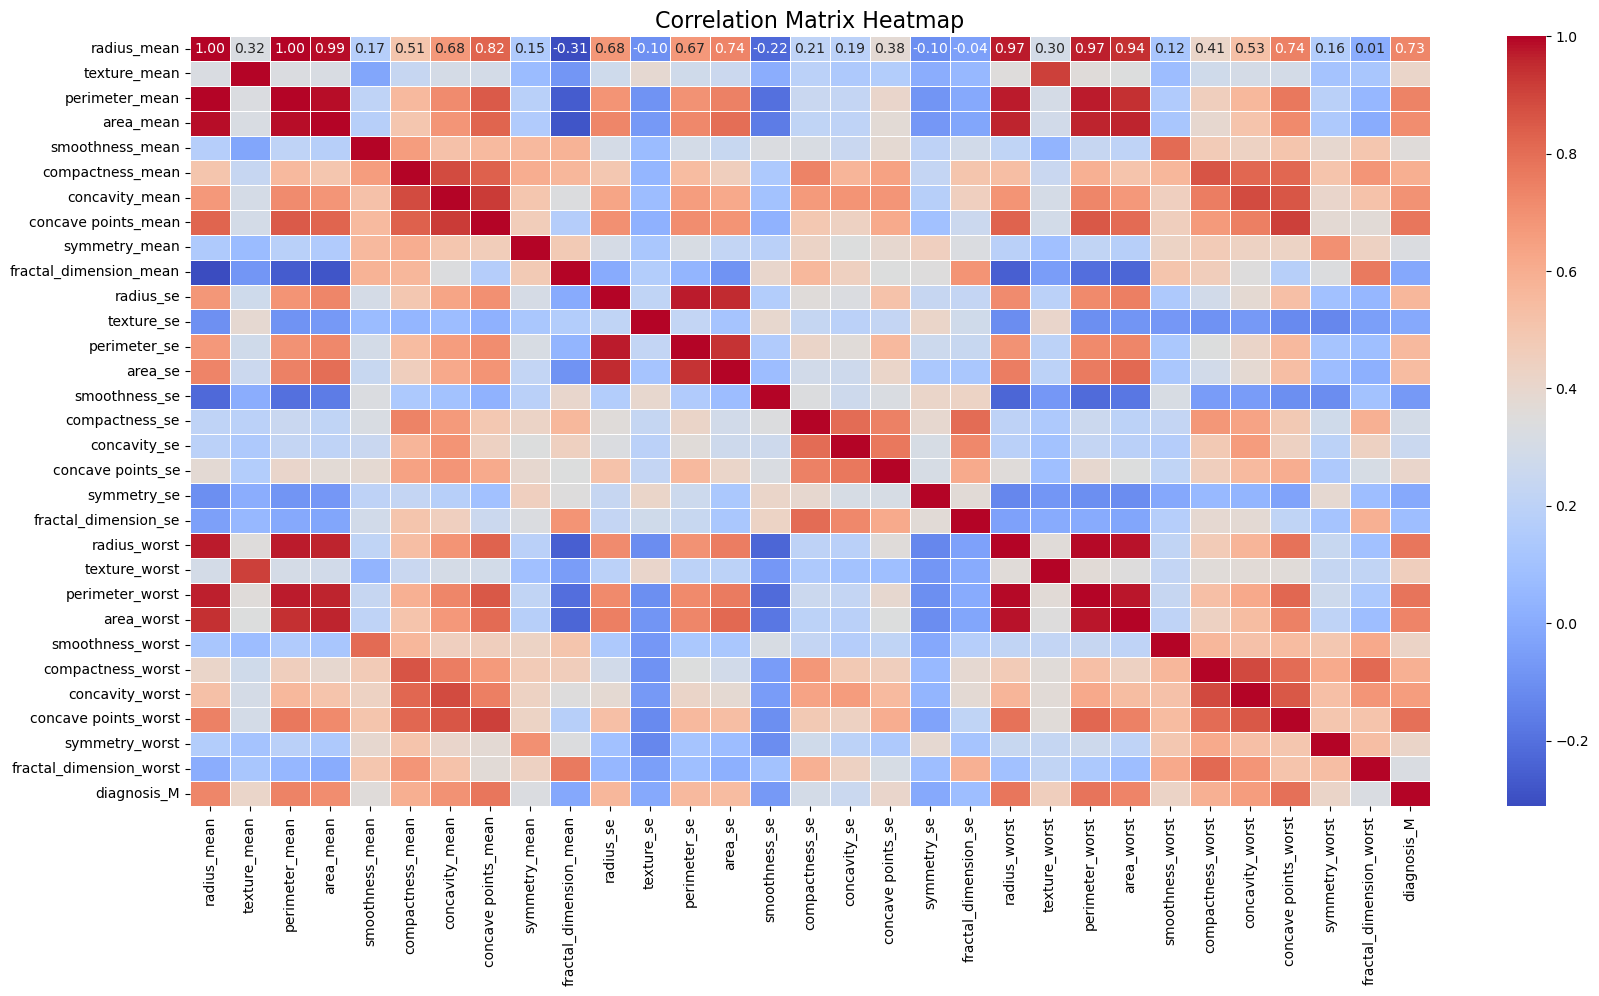

In [13]:
# Plot Heatmap of Correlation Analysis
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Data Modelling and Feature Scaling


In [14]:
# Importing necessary libraries
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Seperate Dataset into Features and Labels
X = df.drop('diagnosis_M', axis = 1)
y = df['diagnosis_M']

In [16]:
# Splitting Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [17]:
# Scaling numerical features
scaler = StandardScaler()

In [18]:
# Scaling X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Model

In [19]:
# Importing Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [20]:
# Define the names of the classifiers (Focusing on just 3 classifiers)
names = ['Logistic Regression', 'Nearest Neighbors', 'Random Forest']

In [21]:
# Define the classifiers with their respective hyperparameters
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    ]

In [22]:
# Empty lists to store results
results = []  # Stores evaluation metrics for each classifier
models = {}  # Stores trained models
confusion_mat = {}  # Stores confusion matrices for each classifier
class_report = {}  # Stores classification reports for each classifier

# Iterate over each classifier
for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    clf.fit(X_train, y_train)
    
    print ('... predicting')
    # Predicting on the training data
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    # Calculating evaluation metrics
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall    = recall_score(y_train, y_pred)
    f1        = f1_score(y_test, y_pred_test)

       
    # Save the results to dictionaries
    models[name] = clf    
    confusion_mat[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)
    
    # Append results to the list
    results.append([name, accuracy, precision, recall, f1])

    
# Convert results to DataFrame for easy visualisation
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1'])
results.set_index('Classifier', inplace= True)

print ('Finished!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Finished!


In [23]:
# Viewing Results
results.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1
Classifier,,,,
Logistic Regression,0.986813,0.988024,0.976331,0.964706
Random Forest,0.982418,0.987879,0.964497,0.939759
Nearest Neighbors,0.980220,1.000000,0.946746,0.930233


### Checking Model Robustness

In [25]:
for model in classifiers:
    cross_score = cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
    print(model, ':')
    print("Accuracy is {:.2f} %".format(cross_score.mean()*100))
    print("Standard Deviation is {:.2f} %".format(cross_score.std()*100))
    print()
    print()

LogisticRegression() :
Accuracy is 97.36 %
Standard Deviation is 1.93 %


KNeighborsClassifier() :
Accuracy is 96.70 %
Standard Deviation is 3.02 %


RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10) :
Accuracy is 96.04 %
Standard Deviation is 2.35 %




## Hyperparameter Optimisation

In [26]:
# Importing Libraries
from sklearn.model_selection import GridSearchCV

In [27]:
params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }

In [28]:
grid_search = GridSearchCV(estimator=models['Logistic Regression'] , param_grid=params, 
                                   scoring='f1', cv=5, verbose=1)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Victor\anaconda3\envs\ML_env\Lib\sit

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=1)

In [30]:
grid_search.best_estimator_

LogisticRegression(C=0.25, penalty='l1', solver='liblinear')

In [31]:
grid_search.best_score_

0.9702304566449316

In [32]:
grid_search.best_params_

{'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}

# Final model (Logistic regression)

In [33]:
class_lr = grid_search.best_estimator_
class_lr.fit(X_train, y_train)

LogisticRegression(C=0.25, penalty='l1', solver='liblinear')

In [34]:
y_pred = class_lr.predict(X_test)

In [35]:
def calc_metrics(test_y, gen_y):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    return acc,f1,pre,rec

In [36]:
acc_score, f1_score, pre_score, rec_score = calc_metrics(y_test, y_pred)

In [37]:
print("Accuracy:", acc_score)
print("F1 Score:", f1_score)
print("Precision:", pre_score)
print("Recall:", rec_score)

Accuracy: 0.9736842105263158
F1 Score: 0.9655172413793104
Precision: 0.9545454545454546
Recall: 0.9767441860465116


## Cross validation

In [38]:
cross_score = cross_val_score(estimator=class_lr, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(cross_score.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.58 %
Standard Deviation is 2.09 %


# Predicting a single observation

In [93]:
single_obs = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,	0.3001,	0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [92]:
class_lr.predict(scaler.transform(single_obs))

C:\Users\Victor\anaconda3\envs\ML_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)